# Download climate model variables

Download climate raster layers covering  study area envelope, including:

- At least one **climate** variable from the [MACAv2 THREDDS data server](http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html).
  - Pick 2 of these
  - [GeoNetwork](https://docs.geonetwork-opensource.org/4.2/):
[THREDDS Harvesting](https://docs.geonetwork-opensource.org/4.2/user-guide/harvesting/harvesting-thredds/)
- [CONUS Page](http://thredds.northwestknowledge.net:8080/thredds/catalog/MACAV2/BNU-ESM/catalog.html?dataset=REACCHDatasetScan_BNU-ESM_MACAV2/macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2026_2030_CONUS_monthly.nc)
  - OPENDAP example URL:
`http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_pr_BNU-ESM_r1i1p1_rcp85_2026_2030_CONUS_monthly.nc`
(strip off trailing `.html`)
- Climate Scenarios: Consider climate variables air termperature or precipitation (`_pr_`) with OPENDAP
    - monthly data
    - 5-year interval (2026-30) 
    - [RCP](https://coastadapt.com.au/infographics/what-are-rcps) 4.5 (current) vs 8.5 (high) [third option: historical]
- [earthdatascience.org Tutorials](https://www.earthdatascience.org/courses/use-data-open-source-python)
  - [EDA Lesson 2. Introduction to the CMIP and MACA v2 Climate Data](https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/intro-to-MACAv2-cmip5-data/).
  - [EDA Lesson 3. How to Download MACA2 Climate Data Using Python](https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/get-maca-2-climate-data-netcdf-python/).
- Elsa Video
    - [MACA THREDDS Climate Projections](https://o365coloradoedu-my.sharepoint.com/personal/alpo6007_colorado_edu/_layouts/15/stream.aspx?id=%2Fpersonal%2Falpo6007%5Fcolorado%5Fedu%2FDocuments%2FAttachments%2FGMT20241204%2D184128%5FRecording%5F1758x1024%201%2Emp4&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2E9d3173e0%2D79c8%2D4027%2D95d3%2D7b49bec923d0)
- Climate Scenario References
  - [Representative Concentration Pathways – RCCAP – Regional Climate Consortium for Asia and the Pacific](https://www.rccap.org/guidance-and-case-studies/understanding-climate-model-data/representative-concentration-pathways/)
  - <https://coastadapt.com.au/infographics/what-are-rcps>
  - <https://climate.copernicus.eu/sites/default/files/2021-01/infosheet3.pdf>
  - <https://oceanconservancy.org/blog/2022/03/01/ipcc/>
  - <https://www.ipcc.ch/report/ar6/syr/> &
<https://www.ipcc.ch/site/assets/uploads/2018/02/ar5_wgII_spm_en.pdf>
  - <https://www.climatehubs.usda.gov/hubs/northwest/topic/what-are-climate-model-phases-and-scenarios> 

In [1]:
pip install --quiet ~/Documents/GitHub/landmapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from landmapy.habitat import create_data_dir, merge_soil, maca_year, process_maca
from landmapy.index import redline_over_index

import rioxarray as rxr

More packages for slope and aspect

In [3]:
import earthaccess
import xrspatial
import rioxarray as rxr
import rioxarray.merge as rxrmerge

import os
from glob import glob

/Users/brianyandell/miniconda3/envs/earth-analytics-python/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
data_dir = create_data_dir('habitat')
data_dir

'/Users/brianyandell/earth-analytics/data/habitat'

In [5]:
%store -r buffalo_gdf
print(buffalo_gdf.total_bounds)
#buffalo_gdf.plot()

[-104.05473027   42.74093601 -101.47233564   43.99459902]


In [41]:
buffalo_gdf

,OBJECTID,NATIONALGRASSLANDID,GRASSLANDNAME,GIS_ACRES,SHAPEAREA,SHAPELEN,geometry
12,185977,295518010328,Buffalo Gap National Grassland,654877.177,0.295196,33.006274,"MULTIPOLYGON (((-102.3384 43.93679, -102.33339..."
15,185980,295521010328,Oglala National Grassland,215804.927,0.096279,1.970612,"POLYGON ((-103.72478 43.001, -103.725 43.001, ..."


In [7]:
buffalo_gdf['color'] = ['white','red']

In [8]:
buffalo_gdf['color'].values[0]

'white'

In [5]:
maca_df = process_maca({'buffalo': buffalo_gdf})

In [6]:
maca_df[['site_name', 'scenario', 'climate', 'year']]

,site_name,scenario,climate,year
0,buffalo,pr,rcp85,2026
1,buffalo,pr,rcp45,2026


### Plot MACA

Now what I want to do is be able to plot each of the MACA images.
Borrowing heavily from
[Hannah Rieder Step 3](https://github.com/hanried/habitat-suitability/blob/main/03-habitat-suitability-climate.ipynb).

Year 2026, RCP85, precipitation.

In [8]:
maca_2027 = maca_year(maca_df, 0, 2027)
maca_2027

In [11]:
#maca_2027.plot()

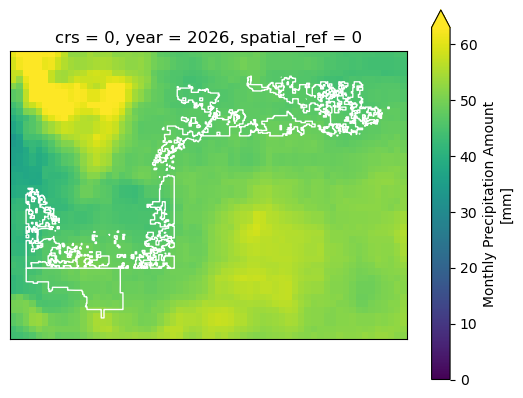

In [27]:
maca_2027 = maca_year(maca_df, 0, 2027)
redline_over_index(buffalo_gdf, maca_2027, edgecolor="white")

Year 2026, RCP45, precipitation.

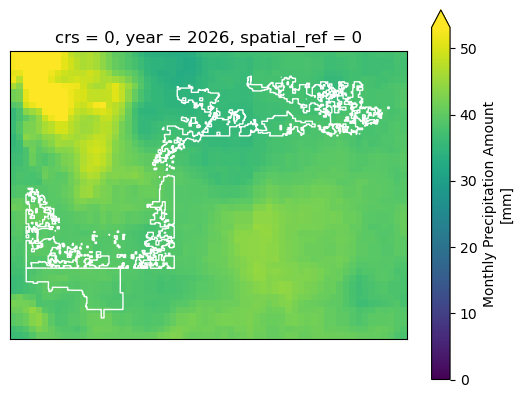

In [28]:
redline_over_index(buffalo_gdf, maca_year(maca_df, 1, 2027), edgecolor="white")